In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## Solve reaction kinetics

$ A + B \rightarrow C$ with rate $r_1(t) = k_1 A(t) B(t)$

$ C \rightarrow D$ with rate $r_1(t) = k_2 C(t)$


In [2]:
# parameter values and inital values
k1 = 0.2 # unit: 1/(s * mol/L)
k2 = 0.1 # unit: 1/s
A0 = 3 # mol/L
B0 = 2 # mol/L
C0 = 0 # mol/L
D0 = 0 # mol/L
T_max = 30 # max. simulation time in s

In [3]:
# define system of ordinary differential equations (ODE)
def rhs(t, y):
    [A, B, C, D] = y
    r1 = k1 * A * B
    r2 = k2 * C
    dAdt = -r1
    dBdt = -r1
    dCdt = +r1 - r2
    dDdt = +r2
    return [dAdt, dBdt, dCdt, dDdt]

In [4]:
solution = solve_ivp(rhs, [0,T_max], [A0, B0, C0, D0], t_eval=np.linspace(0,T_max,1001))

Text(0, 0.5, 'Concentration [mol/L]')

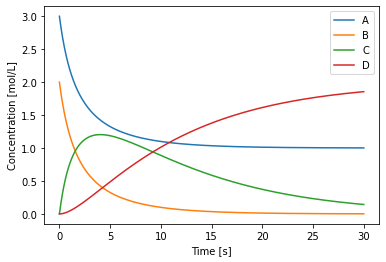

In [5]:
plt.plot(solution.t, solution.y.T)
plt.legend(['A','B','C','D'])
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/L]')